# Tinder_Match_Prediction


### It's a classification problem, where we need to identify how many people uses tinder, consistency of that, i have solved this problem with 91% accuracy....!

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data_train = pd.read_csv('Tinder_Train.csv')
data_test = pd.read_csv('Tinder_Test.csv')

In [3]:
data_train

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0
...,...,...,...,...,...,...,...,...
1891,1891,292887.5496,web,"Meridian, Idaho",No,0.000000,0.000000,0
1892,1892,292881.6932,mobile,"Meridian, Idaho",No,1203.190399,0.312360,0
1893,1893,292900.8499,gender,"Meridian, Idaho",No,806.378820,0.488025,0
1894,1894,292893.8600,gender,"Meridian, Idaho",No,1149.529381,0.488984,0


In [4]:
data_test

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage
0,0,292974.2311,university,"University of California, Davis",Yes,0.230742,0.115371
1,1,292889.7996,web,"Meridian, Idaho",No,0.000000,0.000000
2,2,293724.0350,university,"Westport, CT",Yes,0.000000,0.000000
3,3,292884.0724,mobile,"Meridian, Idaho",No,1497.699982,0.388752
4,4,292882.0964,mobile,"Meridian, Idaho",No,1439.464988,0.373646
...,...,...,...,...,...,...,...
627,627,293085.4757,university,University of Miami,Yes,1.000000,0.743904
628,628,292890.5771,web,"Meridian, Idaho",No,0.000000,0.000000
629,629,292891.5922,gender,"Meridian, Idaho",No,1104.827490,0.411368
630,630,292889.9699,web,"Meridian, Idaho",No,0.000000,0.000000


In [5]:
data_train.head()

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,0,292890.8970,web,"Meridian, Idaho",No,0.000000,0.000000,0
1,1,292887.9870,web,"Meridian, Idaho",No,0.000000,0.000000,0
2,2,292894.0656,gender,"Meridian, Idaho",No,499.173606,0.225255,0
3,3,292887.1180,web,"Meridian, Idaho",No,0.000000,0.000000,0
4,4,292893.6561,gender,"Meridian, Idaho",No,455.925963,0.211360,0


In [6]:
data_test.head()

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage
0,0,292974.2311,university,"University of California, Davis",Yes,0.230742,0.115371
1,1,292889.7996,web,"Meridian, Idaho",No,0.000000,0.000000
2,2,293724.0350,university,"Westport, CT",Yes,0.000000,0.000000
3,3,292884.0724,mobile,"Meridian, Idaho",No,1497.699982,0.388752
4,4,292882.0964,mobile,"Meridian, Idaho",No,1439.464988,0.373646


In [7]:
data_train.isnull().sum()

Unnamed: 0                  0
ID                          0
Segment type                0
Segment Description         0
Answer                      0
Count                       0
Percentage                  0
It became a relationship    0
dtype: int64

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1896 non-null   int64  
 1   ID                        1896 non-null   float64
 2   Segment type              1896 non-null   object 
 3   Segment Description       1896 non-null   object 
 4   Answer                    1896 non-null   object 
 5   Count                     1896 non-null   float64
 6   Percentage                1896 non-null   float64
 7   It became a relationship  1896 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 118.6+ KB


In [9]:
data_train.describe()

,Unnamed: 0,ID,Count,Percentage,It became a relationship
count,1896.000000,1896.000000,1896.000000,1896.000000,1896.000000
mean,947.500000,292999.394750,446.881267,0.254098,0.350738
std,547.472374,227.809806,494.110578,0.220809,0.477327
min,0.000000,292881.000000,0.000000,0.000000,0.000000
25%,473.750000,292888.196925,0.000000,0.000000,0.000000
50%,947.500000,292893.904400,400.439633,0.257873,0.000000
75%,1421.250000,292902.568750,845.560798,0.396787,1.000000
max,1895.000000,293785.000000,1969.000000,1.000000,1.000000


C:\Users\valpa\Anaconda Files\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='It became a relationship', ylabel='count'>

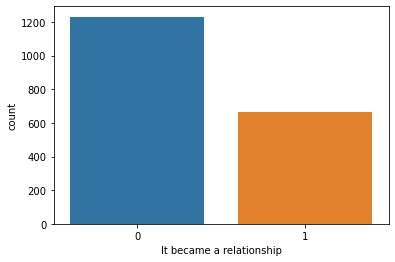

In [10]:
sns.countplot(data_train['It became a relationship'])

C:\Users\valpa\Anaconda Files\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Answer', ylabel='count'>

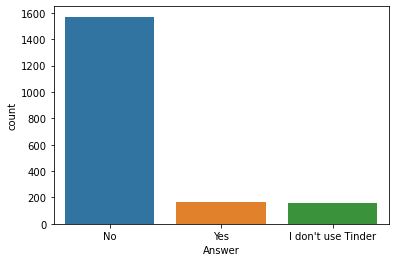

In [11]:
sns.countplot(data_train['Answer'])

# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

number =LabelEncoder()
data_train["Segment type"]=number.fit_transform(data_train["Segment type"].astype('str'))
data_train.head()

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,0,292890.8970,3,"Meridian, Idaho",No,0.000000,0.000000,0
1,1,292887.9870,3,"Meridian, Idaho",No,0.000000,0.000000,0
2,2,292894.0656,0,"Meridian, Idaho",No,499.173606,0.225255,0
3,3,292887.1180,3,"Meridian, Idaho",No,0.000000,0.000000,0
4,4,292893.6561,0,"Meridian, Idaho",No,455.925963,0.211360,0


In [14]:
data_test["Segment type"]=number.fit_transform(data_test["Segment type"].astype('str'))
data_test.head()

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage
0,0,292974.2311,2,"University of California, Davis",Yes,0.230742,0.115371
1,1,292889.7996,3,"Meridian, Idaho",No,0.000000,0.000000
2,2,293724.0350,2,"Westport, CT",Yes,0.000000,0.000000
3,3,292884.0724,1,"Meridian, Idaho",No,1497.699982,0.388752
4,4,292882.0964,1,"Meridian, Idaho",No,1439.464988,0.373646


In [16]:
data_train["Segment Description"]=number.fit_transform(data_train["Segment Description"].astype('str'))
data_train["Answer"]=number.fit_transform(data_train["Answer"].astype('str'))


data_test["Segment Description"]=number.fit_transform(data_test["Segment Description"].astype('str'))

data_test["Answer"]=number.fit_transform(data_test["Answer"].astype('str'))

In [17]:
data_train.head()

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage,It became a relationship
0,0,292890.8970,3,46,1,0.000000,0.000000,0
1,1,292887.9870,3,46,1,0.000000,0.000000,0
2,2,292894.0656,0,46,1,499.173606,0.225255,0
3,3,292887.1180,3,46,1,0.000000,0.000000,0
4,4,292893.6561,0,46,1,455.925963,0.211360,0


In [18]:
data_test.head()

,Unnamed: 0,ID,Segment type,Segment Description,Answer,Count,Percentage
0,0,292974.2311,2,60,2,0.230742,0.115371
1,1,292889.7996,3,29,1,0.000000,0.000000
2,2,293724.0350,2,98,2,0.000000,0.000000
3,3,292884.0724,1,29,1,1497.699982,0.388752
4,4,292882.0964,1,29,1,1439.464988,0.373646


In [19]:
data_train.drop('ID',axis=1,inplace=True)
data_test.drop('ID',axis=1,inplace=True)

# Correaltion

<AxesSubplot:>

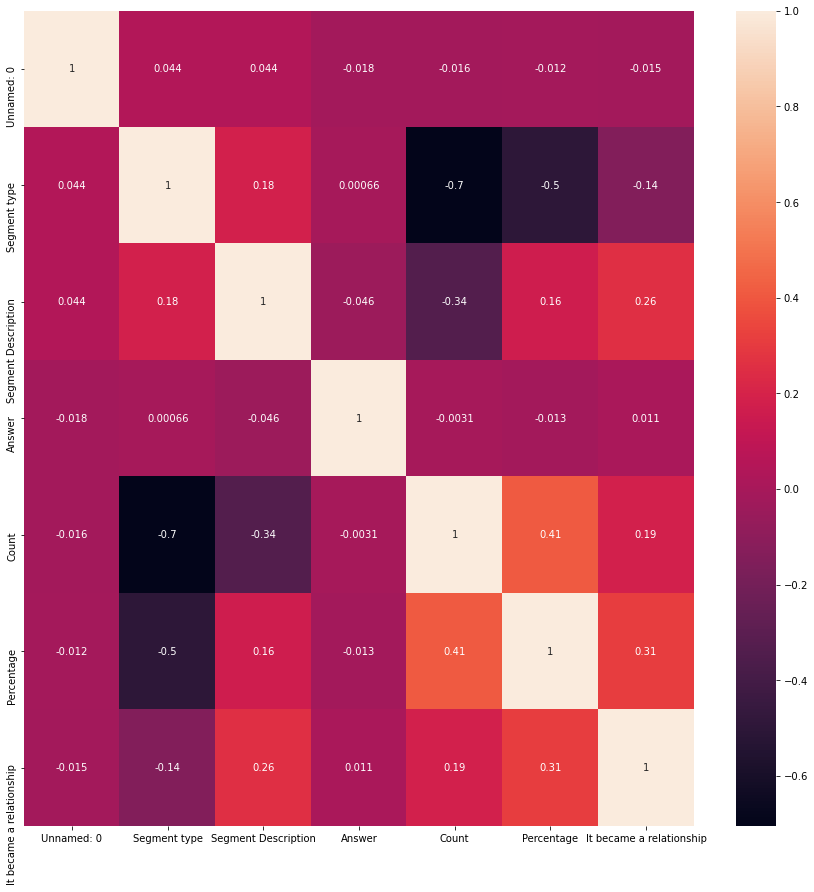

In [20]:
#Visualizing correlation
plt.figure(figsize = (15,15))
import seaborn as sns
corr = data_train.corr()
sns.heatmap(corr, annot = True)

In [21]:
data_train.shape,data_test.shape

((1896, 7), (632, 6))

# Assighning X and Y values

In [23]:
X = data_train.drop(['It became a relationship'],axis=1)
y = data_train['It became a relationship']
test = data_test

In [24]:
X.shape,y.shape,test.shape

((1896, 6), (1896,), (632, 6))

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train ,y_test =train_test_split(X,y , test_size = 0.2 , random_state =0)

# Random forrest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier()
rfr.fit(X_train,y_train)
#Predicting the Test set results
y_pred_rfr = rfr.predict(X_test)

# Accuracy:

In [27]:
from sklearn.metrics import accuracy_score

import warnings

warnings.filterwarnings('ignore')

accuracy_score(y_test,y_pred_rfr)

0.9236842105263158